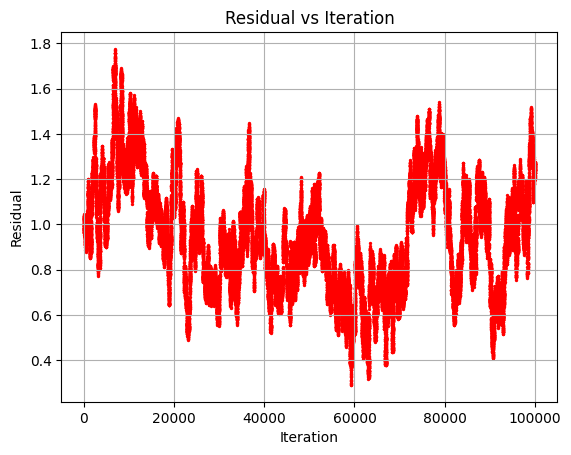

Minimum Residual is at :  59180
a1: 4.7210510365933205
a2: 5.577427723641133
a3: 5.233928908031034
a4: 6.274374923773152
a5: 6.509099451283246
a6: 5.038806547980815
a7: 6.776079841276317
a8: 7.613230261181105
a9: 6.746885209987064
[7.0575373  5.23250874 5.12184271 5.43201983 5.79562322 4.08708468
 4.37665752 6.45992756 6.5647257 ]
[np.float64(1.039540432320946), np.float64(1.0458697460801694), np.float64(1.0428879436264489), np.float64(1.0338298998866104), np.float64(1.0271712856061215), np.float64(1.0233955858700863), np.float64(1.0202215659816827), np.float64(1.0277671955320669), np.float64(1.027755930041736), np.float64(1.038517086729029), np.float64(1.0319041518416332), np.float64(1.0355244443175848), np.float64(1.033166788691831), np.float64(1.0254455512634537), np.float64(1.0167996772260586), np.float64(1.022632497200343), np.float64(1.0280982471879463), np.float64(1.0340426306035344), np.float64(1.0225078235484164), np.float64(1.0238038247217411), np.float64(1.0228836551731222),

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 256
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)
mask = r <= 1
np.random.seed(0)

def Zernike(a1, a2, a3, a4, a5, a6, a7, a8, a9):
    Z = (a1*(2*r**2 - 1) +
         a2*r**2*np.cos(2*theta) +
         a3*r**2*np.sin(2*theta) +
         a4*r*np.cos(theta) +
         a5*r*np.sin(theta) +
         a6*(3*r**3 - 2*r)*np.sin(2*theta) +
         a7*(3*r**3 - 2*r)*np.cos(2*theta)+
         a8*r**3*np.sin(3*theta)+
         a9*(6*r**4 - 6*r**2 +1))
    return Z * mask

moments_target = np.array([4.2, 5.6, 5.2, 6.2, 6.8, 4.3,6.4,7.2,6.5])
Zernike_target = Zernike(*moments_target)

sigma = 1.0

def prior(moments):
    moments = np.array(moments)
    if np.all((moments >= 4) & (moments <= 8)):
        return 0.0
    return -np.inf

def log_likelihood(moments):
    diff = Zernike(*moments) - Zernike_target
    return -np.mean(diff**2)

def posterior(moments):
    lp = prior(moments)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(moments)

n_iter = 100000
current = np.random.uniform(4, 8, 9)
residuals = []
moments = []
step = 0.03
for i in range(n_iter):

    trial = current + step * np.random.randn(9)

    logp_current = posterior(current)
    logp_trial   = posterior(trial)

    if np.isfinite(logp_trial):
        log_r = logp_trial - logp_current
        if np.log(np.random.rand()) < log_r:
            current = trial

    R = np.mean(np.abs(Zernike(*current) - Zernike_target))
    residuals.append(R)
    moments.append(current)
iterations = np.arange(n_iter)

plt.scatter(iterations, residuals, s=2, color = 'red')
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.title("Residual vs Iteration")
plt.grid()
plt.show()
minimum_residual = np.argmin(residuals)
Zernike_moments = moments[minimum_residual]
print("Minimum Residual is at : ", minimum_residual)
print("a1:", Zernike_moments[0])
print("a2:", Zernike_moments[1])
print("a3:", Zernike_moments[2])
print("a4:", Zernike_moments[3])
print("a5:", Zernike_moments[4])
print("a6:", Zernike_moments[5])
print("a7:", Zernike_moments[6])
print("a8:", Zernike_moments[7])
print("a9:", Zernike_moments[8])
print(current)
print(residuals)
k_1 = 3183
k_2 = 3184
k = 4592
k1 = 3186
k2 = 3187
print(f"Iteration {k}")
print("Residual:", residuals[k])
print("Moments:", moments[k])
print(f"Iteration {k_1}")
print("Residual:", residuals[k_1])
print("Moments:", moments[k_1])
print(f"Iteration {k_2}")
print("Residual:", residuals[k_2])
print("Moments:", moments[k_2])
print(f"Iteration {k1}")
print("Residual:", residuals[k1])
print("Moments:", moments[k1])
print(f"Iteration {k2}")
print("Residual:", residuals[k2])
print("Moments:", moments[k2])
